In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# 加载数据
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label'] = iris.target

In [12]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

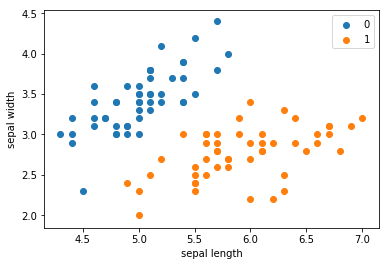

In [13]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [14]:
data = np.array(df.iloc[:100,[0,1,-1]])

In [15]:
X,y = data[:,:-1],data[:,-1]

In [17]:
y = np.array([1 if i == 1 else -1 for i in y])

感知机的损失函数：$ -\frac{1}{\|w\|} * \sum_{i=1}^{m} y_{i}\left(w \cdot x_{i}+b\right) $


In [18]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1,dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
    def sign(self,x,w,b):
        y = np.dot(x,w) + b
        return y
    # 随机梯度下降
    def fit(self,X_train,y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for i in range(len(X_train)):
                X = X_train[i]
                y = y_train[i]
                if y*self.sign(X,self.w,self.b) <= 0:
                    self.w = self.w + self.l_rate*np.dot(y,X)
                    self.b = self.b + self.l_rate*y
                    wrong_count += 1
                if wrong_count == 0:
                    is_wrong = True
        return "Perceptron Model!"
    def score(self):
        pass

In [19]:
perceptron = Model()
perceptron.fit(X,y)

'Perceptron Model!'

In [20]:
x_points = np.linspace(4,7,10)

In [24]:
perceptron.w

array([ 1.91, -2.21])

In [25]:
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]

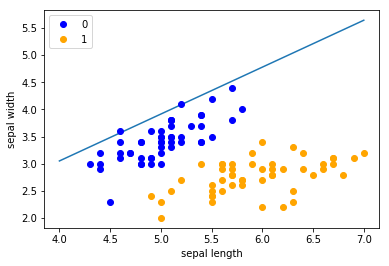

In [27]:
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**<font>scikit-learn实例</font>**

In [28]:
from sklearn.linear_model import Perceptron

In [29]:
clf = Perceptron(fit_intercept=False,max_iter=1000,shuffle=False)
clf.fit(X,y)

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=False, max_iter=1000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=False, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
# 权重
print(clf.coef_)

[[  74.6 -127.2]]


In [31]:
# 截距
print(clf.intercept_)

[0.]


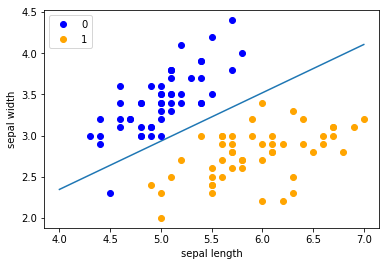

In [33]:
x_points = np.arange(4,8)
y_ = -(clf.coef_[0][0]*x_points + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_points,y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()